# Intensive Module in Machine Learning
# Problem set 6: Support Vector Machines

If you are looking at the pdf/html version of this document, start by running the command `jupyter notebook` to launch an interactive notebook and then navigate to the correct folder and open this file `problem-set-6.ipynb`. Import your default packages for manipulating data and plotting:

In [54]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

## 1. Support Vector Classifier

## 1.1 Toy example

a) Generate a toy data set of random points in the plane of two classes. Plot the points in a scatter plot and colour the two labels. Make sure your random points have some structure (say one class further to the left one further to the right).

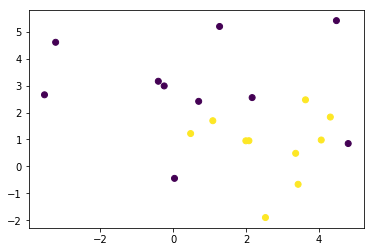

In [55]:
#Let's fix the random seed
np.random.seed(2000)

data = np.zeros(shape=(3,20))
data[0,:10] = np.random.normal(1,2,10)
data[1,:10] = np.random.normal(3,2,10)
data[0,10:] = np.random.normal(3,1,10)
data[1,10:] = np.random.normal(1,1,10)
data[2,10:] = np.ones(10)

plt.scatter(data[0,:], data[1,:], c=data[2,:])
plt.show()

b) Train a support vector classifier (linear model).

In [56]:
from sklearn.svm import SVC

X = np.transpose(data[0:2,:])
y = data[2,:]

model = SVC(kernel='linear')
model.fit(X,y)
model.score(X,y)

0.84999999999999998

c) Add the decision boundary to your scatter plot. 

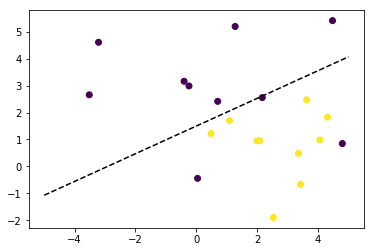

In [57]:
def plot_hyperplane(clf, min_x, max_x, linestyle):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 1, max_x + 1)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle)

plt.scatter(data[0,:], data[1,:], c=data[2,:])
plot_hyperplane(model, -4, 4, 'k--')
plt.show()

## 1.2 Support vector classifier for Spam data

Let's go back to the spam data set from day 1.

a) Load the data and split it in train and cross-validation set.

In [45]:
data2 = pd.read_csv('Spam_Data.txt', sep=",", header=None)

#Split data into training and testing data
mask = np.random.rand(len(data2)) < 0.8
train = data2[mask]
test = data2[~mask]

#Split training data into training and cross validation data
mask = np.random.rand(len(train)) < 0.8
cvset = train[~mask]
train = train[mask]

X2 = train.loc[:, range(0,57)]
y2 = train.loc[:, 57]
X2_cv = cvset.loc[:, range(0,57)]
y2_cv = cvset.loc[:, 57]
X2_test = test.loc[:, range(0,57)]
y2_test = test.loc[:, 57]

b) Train a support vector classifier (linear model).

In [35]:
model2 = SVC(kernel='linear')
model2.fit(X2,y2)
model2.score(X2,y2)

0.93600273785078714

c) Use the corss-validation set to determine the optimal value of your cost parameter.

In [63]:
costs = [0.001,0.01,0.1,1,10]

scores = list()

for c in costs:
    model2 = SVC(C= c, kernel='linear')
    model2.fit(X2,y2)
    scores.append(model2.score(X2_cv,y2_cv))


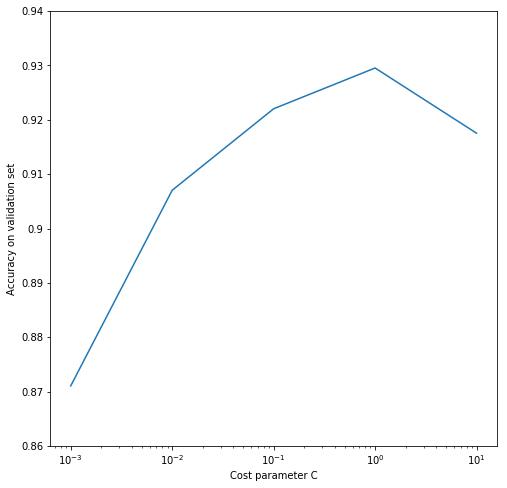

In [43]:
# Let's plot the outcome of our CV
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.plot(costs, scores)
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('Accuracy on validation set')
plt.xlabel('Cost parameter C')
plt.xscale('log')
plt.show()

d) Report the model performance (missclassification rate, AUC) of your best model.

In [61]:
from sklearn import metrics

model2 = SVC(C= 1, kernel='linear')
model2.fit(X2,y2)
print('Accuracy on test set:',model2.score(X_test,y_test))

pred = model2.predict(X2_test)
fpr, tpr, _ = metrics.roc_curve(y2_test, pred)
print('AUC:',metrics.auc(fpr, tpr))

Accuracy on test set: 0.932773109244
AUC: 0.926582620313


# 2. Support Vector Machines

## 2.1 Toy example

Let's go back to the toy example from the first exercise

a) Train different SVMs using different kernels (exponential, quadratic). 

In [58]:
model3 = SVC(kernel = 'rbf')
model4 = SVC(kernel = 'poly', degree = 2)

model3.fit(X,y)
model4.fit(X,y)

print('Accuracy of exponential kernel SVM:', model3.score(X,y))
print('Accuracy of quadratic kernel SVM:', model4.score(X,y))

Accuracy of exponential kernel SVM: 1.0
Accuracy of quadratic kernel SVM: 0.85


b) Look at the decision boundaries for each case. Hint: To plot it you might take a grid of points on a dense mesh in the plane, run the predict function on it and then plot them with their predicted label.

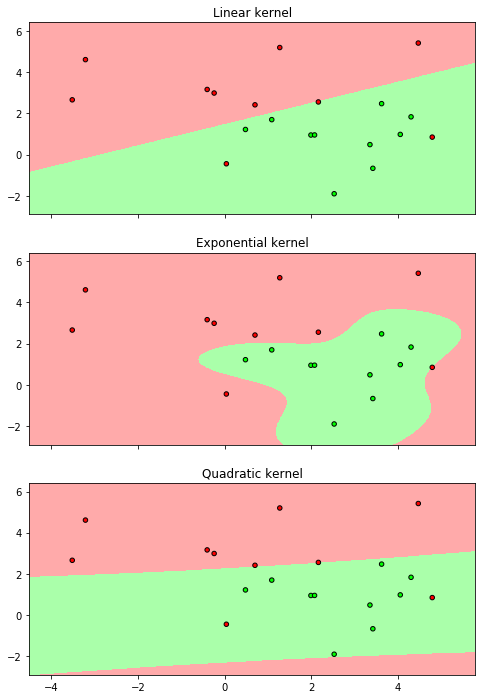

In [60]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00'])

mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50
    
x_min, x_max = data[0,:].min() - 1, data[0,:].max() + 1
y_min, y_max = data[1,:].min() - 1, data[1,:].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))

f, axarr = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(8, 12))

for idx, clf, tt in zip([0,1,2],
                        [model, model3, model4],
                        ['Linear kernel', 'Exponential kernel',
                         'Quadratic kernel']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].pcolormesh(xx, yy, Z, cmap=cmap_light)#contourf(xx, yy, Z, alpha=0.4)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20,cmap = cmap_bold, edgecolor='k')
    axarr[idx].set_title(tt)

plt.show()

## 2.2 Heart Data

For this exercise we go back to the Heart Data.

a) Fit a SVM using an exponential kernel. Tune the models hyper-parameter on the cross-validation set.

<span style="color:blue"> First, we load and preprocess the data. </span>

In [74]:
from sklearn import preprocessing

data3 = pd.read_csv('Heart.csv', sep=",",index_col = 0)
data3 = data3.dropna()

#First, transform response variable AHD to 0-1 encoded class labels
le = preprocessing.LabelEncoder()
le.fit(data3['AHD'])
data3['AHD'] = le.transform(data3['AHD']) 
#Next, transform the 2 feature columns with string values to one-hot-encoded values
data3 = pd.get_dummies(data3,prefix=['ChestPain','Thal'])
#Finally, move 0-1 encoded AHD column to front so we can isolate feature columns easily
cols = list(data3)
cols.insert(0, cols.pop(cols.index('AHD')))
data3 = data3.loc[:, cols]

#Split data into training and test data
mask3 = np.random.rand(len(data3)) < 0.8
train3 = data3[mask3]
test3 = data3[~mask3]

#Split training data into training and cross validation data
mask3 = np.random.rand(len(train3)) < 0.8
cvset3 = train3[~mask3]
train3 = train3[mask3]

X3 = train3.iloc[:,1:]
y3 = train3['AHD']
X3_cv = cvset3.iloc[:,1:]
y3_cv = cvset3['AHD']
X3_test = test3.iloc[:,1:]
y3_test = test3['AHD']

<span style="color:blue"> Then we can fit the SVM with exponential kernel and tune its hyperparameter on the cross validation set.</span>

In [95]:
def svm_rbf_tuned_eval(C, logGamma):
    model = SVC(C=C, kernel = 'rbf', gamma=10**logGamma).fit(X3, y3)
    pred = model.predict(X3_cv)
    fpr, tpr, _ = metrics.roc_curve(y3_cv, pred)
    auc = metrics.auc(fpr, tpr)
    accuracy = model.score(X3_cv,y3_cv)
    return auc,accuracy

costs = [0.01,0.1,1,10,100,1000,10000,100000]
logGamma = [-4,-3,-2,-1,0] 

aucs = np.zeros(len(costs))
scores = np.zeros(len(costs))
gamma = np.zeros(len(costs))

for ii in range(0,len(costs)):
    best_score = 0.0
    for g in logGamma:
        auc,score = svm_rbf_tuned_eval(costs[ii], g)
        if score > best_score:
            best_score = score
            scores[ii] = score
            aucs[ii] = auc
            gamma[ii] = g

print(scores)
print(np.argmax(scores))

[ 0.51219512  0.51219512  0.68292683  0.75609756  0.80487805  0.87804878
  0.80487805  0.75609756]
5


b) Report your final model performance.

In [102]:
#The highest accuracy was achieved for entry 5, so lets test that model on our test data:

model5 = SVC(C = costs[5], kernel = 'rbf', gamma=10**gamma[5])
#join (core) training and cross validation set to regain your full training set
Xframes = [X3, X3_cv]
yframes = [y3, y3_cv]
X4 = pd.concat(Xframes)
y4 = pd.concat(yframes)

model5.fit(X4,y4)

print('Accuracy of finetuned model on test data:', model5.score(X3_test,y3_test))

Accuracy of finetuned model on test data: 0.796610169492
